In [26]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import os

# Preprocesamiento

In [ ]:
imagePath = "C:/Users/felip/OneDrive/POLIMI FORE/SEMESTRE II/ADVANCED_MEASSUREMENTS/PROGETTO/images/Images1/"

baseFolder = os.getcwd()

# Define the folder containing the images
folder = os.path.join(baseFolder, "images", "Images1")

# Read the image in grayscale
img = cv.imread(os.path.join(folder, "border3.jpg"),0)

print(f"Tipo de dato (dtype): {img.dtype}")
print(f"Valor mínimo: {np.min(img)}")
print(f"Valor máximo: {np.max(img)}")

Tipo de dato (dtype): uint8
Valor mínimo: 0
Valor máximo: 255


In [28]:
# THRESHOLD
thValue = 150
_ , thBIN = cv.threshold(img,thValue,255,cv.THRESH_BINARY)
_ , thBININV = cv.threshold(img,thValue,255,cv.THRESH_BINARY_INV)
_ , thTOZERO = cv.threshold(img,thValue,255,cv.THRESH_TOZERO)
_ , thTOZEROINV = cv.threshold(img,thValue,255,cv.THRESH_TOZERO_INV)
_ , thTRUNC = cv.threshold(img,thValue,255,cv.THRESH_TRUNC)

(np.float64(-0.5), np.float64(3023.5), np.float64(3642.5), np.float64(-0.5))

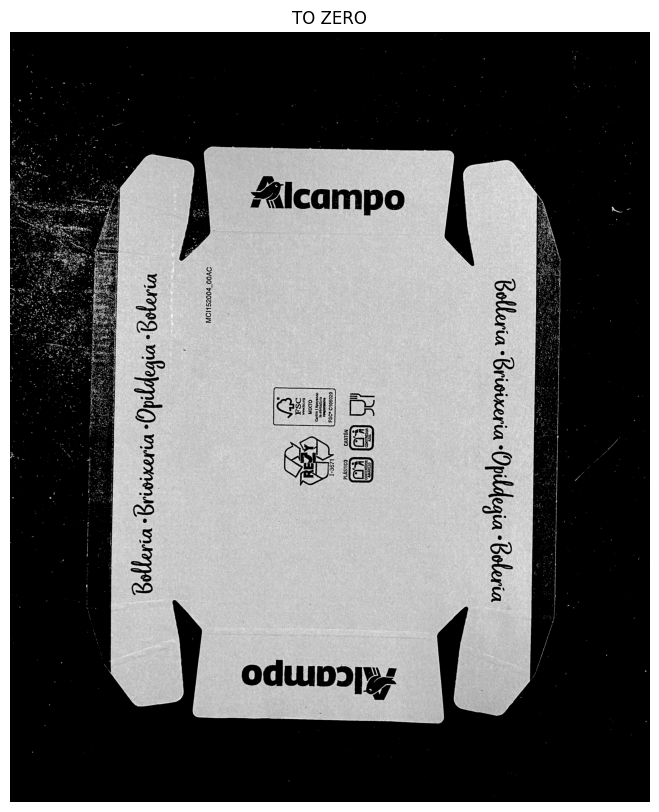

In [29]:
plt.figure(figsize=(15, 10))
plt.imshow(thTOZERO, cmap="gray", vmin=0, vmax=255) # to complete
plt.title("TO ZERO")
plt.axis("off")

(np.float64(-0.5), np.float64(3023.5), np.float64(3642.5), np.float64(-0.5))

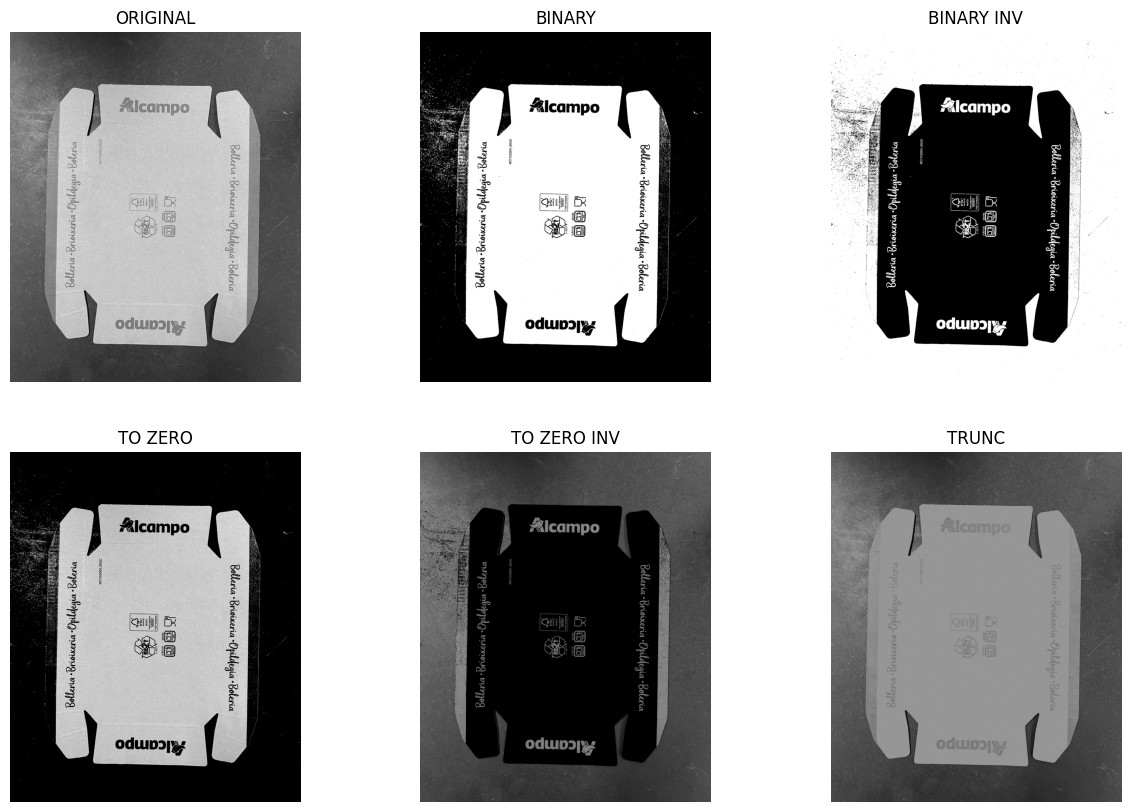

In [30]:
# PLOT IMAGES

plt.figure(figsize=(15, 10))

plt.subplot(2,3,1)
plt.imshow(img, cmap="gray", vmin=0, vmax=255)
plt.title("ORIGINAL")
plt.axis("off")

plt.subplot(2,3,2)
plt.imshow(thBIN, cmap="gray", vmin=0, vmax=255) # to complete
plt.title("BINARY")
plt.axis("off")

plt.subplot(2,3,3)
plt.imshow(thBININV, cmap="gray", vmin=0, vmax=255) # to complete
plt.title("BINARY INV")
plt.axis("off")

plt.subplot(2,3,4)
plt.imshow(thTOZERO, cmap="gray", vmin=0, vmax=255) # to complete
plt.title("TO ZERO")
plt.axis("off")

plt.subplot(2,3,5)
plt.imshow(thTOZEROINV, cmap="gray", vmin=0, vmax=255) # to complete
plt.title("TO ZERO INV")
plt.axis("off")

plt.subplot(2,3,6)
plt.imshow(thTRUNC, cmap="gray", vmin=0, vmax=255) # to complete
plt.title("TRUNC")
plt.axis("off")

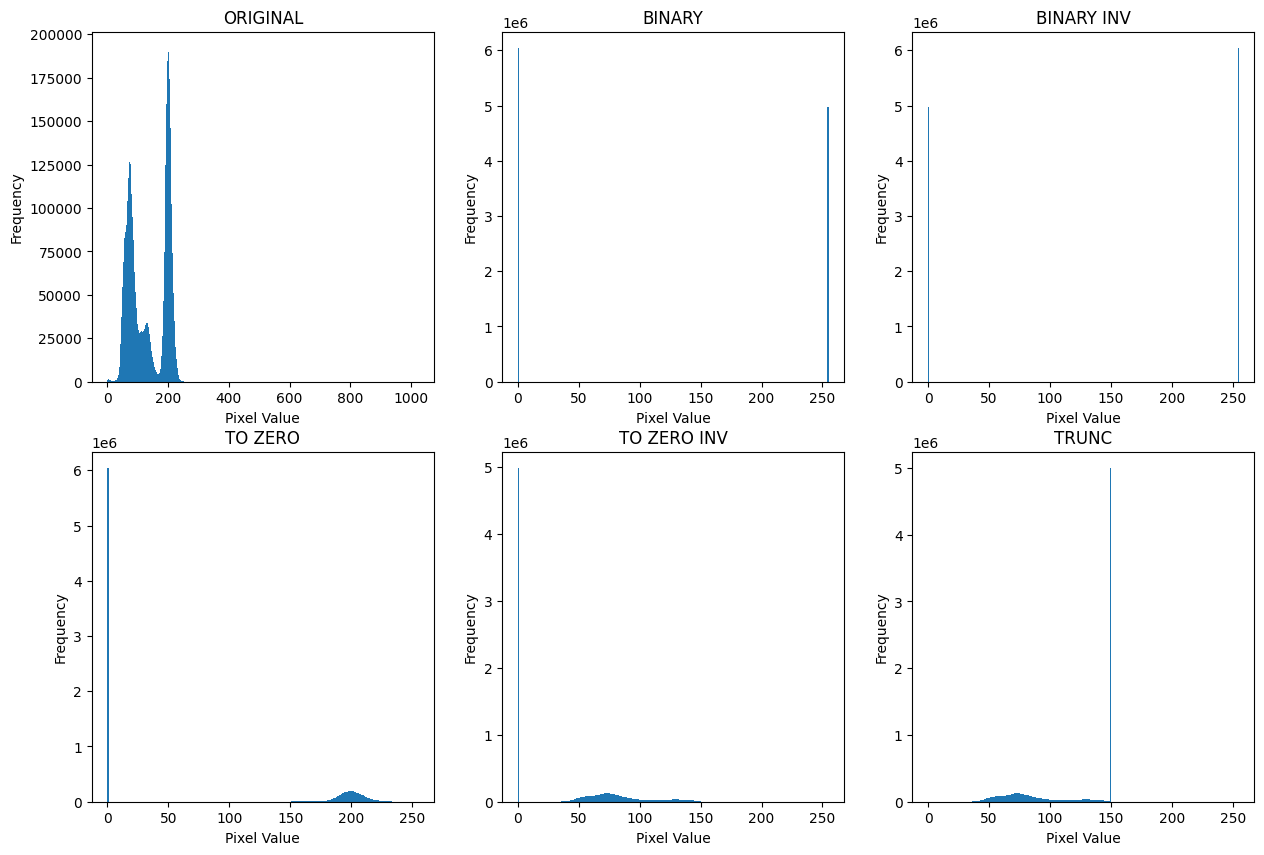

In [37]:
# PLOT HISTOGRAMS

plt.figure(figsize=(15, 10))  # Adjust figure size for better visibility

plt.subplot(2,3,1)
plt.hist(img.ravel(), bins=1024, range=(0, 1024))
plt.title("ORIGINAL")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.subplot(2,3,2)
plt.hist(thBIN.ravel(), bins=256, range=(0, 255)) # to complete
plt.title("BINARY")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.subplot(2,3,3)
plt.hist(thBININV.ravel(), bins=256, range=(0, 255)) # to complete
plt.title("BINARY INV")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.subplot(2,3,4)
plt.hist(thTOZERO.ravel(), bins=256, range=(0, 255)) # to complete
plt.title("TO ZERO")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.subplot(2,3,5)
plt.hist(thTOZEROINV.ravel(), bins=256, range=(0, 255)) # to complete
plt.title("TO ZERO INV")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.subplot(2,3,6)
plt.hist(thTRUNC.ravel(), bins=256, range=(0, 255)) # to complete
plt.title("TRUNC")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")

plt.show()

(3643, 3024)
251
0
Tipo de dato (dtype): uint8
Valor mínimo: 0
Valor máximo: 255
74250


<Figure size 1500x1000 with 0 Axes>

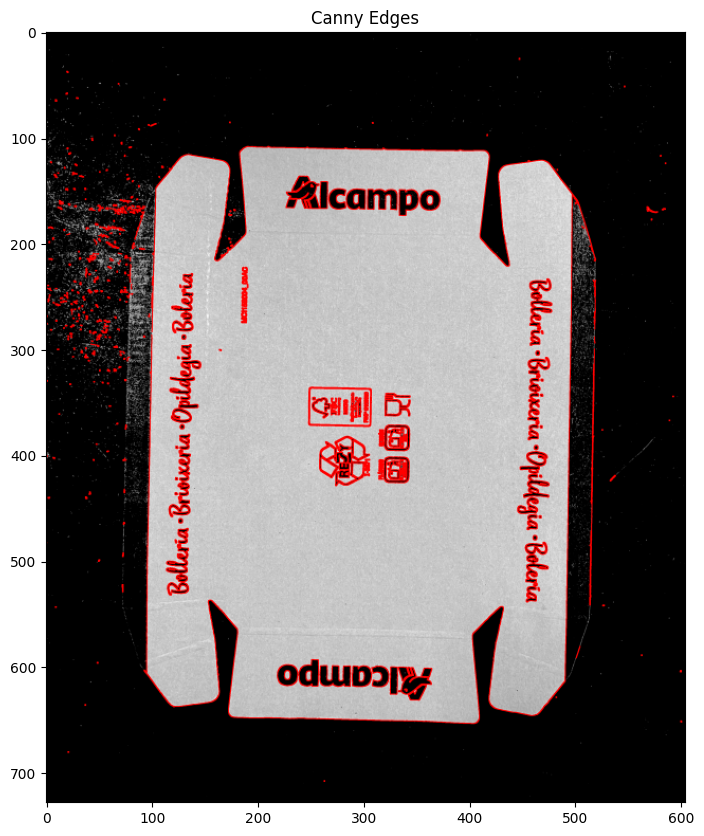

In [ ]:
#img = thTOZERO

img2 = cv.GaussianBlur(thTOZERO, (15 , 15), 1) # to complete
print(img2.shape)
print(np.max(img2))
print(np.min(img2))
"""cv.imshow("Imagen",img2)
cv.waitKey(0)
cv.destroyAllWindows()"""



img_input = thTOZERO  # O la imagen que estés usando en Canny


#img2 = cv.GaussianBlur(img, (15,15), 2)




# -----------------------------
# Verificar tipo de dato y rango de valores
# -----------------------------
print(f"Tipo de dato (dtype): {img_input.dtype}")
print(f"Valor mínimo: {np.min(img_input)}")
print(f"Valor máximo: {np.max(img_input)}")

# -----------------------------
# 1. Detección de bordes: CANNY
# -----------------------------
#canny_edges = cv.Canny(img2, 130, 200, L2gradient=True) # to complete
canny_edges = cv.Canny(img2, 300, 500, L2gradient=True) # to complete
#canny_edges = cv.Canny(img2, 200, 255, L2gradient=True) # to complete
print(np.count_nonzero(canny_edges))
kernel = np.ones((5,5),np.uint8)
canny_edges = cv.dilate(canny_edges,kernel,iterations=1)

# Copia de imagen
img_coppy = img2.copy()

mask = canny_edges > 0

img_coppy = cv.cvtColor(img_coppy, cv.COLOR_GRAY2BGR)
img_coppy[mask] = [0,0,255]

# Redimensionar a 50% del tamaño original
scale_percent = 20  # Puedes ajustar a 30, 60, etc.
width = int(img_coppy.shape[1] * scale_percent / 100)
height = int(img_coppy.shape[0] * scale_percent / 100)
dim = (width, height)

resized = cv.resize(img_coppy, dim, interpolation=cv.INTER_AREA)

plt.figure(figsize=(15, 10))  # Adjust figure size for better visibility

plt.figure(figsize=(15, 10))
plt.title("Canny Edges")
plt.imshow(cv.cvtColor(resized, cv.COLOR_BGR2RGB))




In [33]:
# 1. Encontrar las coordenadas de los píxeles blancos (bordes detectados)
coords = cv.findNonZero(canny_edges)  # Retorna una lista de puntos [[x, y]]

if coords is not None:
    # 2. Obtener el rectángulo delimitador más grande
    x, y, w, h = cv.boundingRect(coords)

    # 3. Dibujar el rectángulo sobre la imagen original en color
    img_color_copy = img2.copy()
    cv.rectangle(img_color_copy, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Verde

    # Redimensionar para visualizar mejor
    img_resized = cv.resize(img_color_copy, (800, int(800 * img2.shape[0] / img2.shape[1])))

    # Mostrar resultado
    cv.imshow("Cuadro sobre bordes", img_resized)
    cv.waitKey(0)
    cv.destroyAllWindows()
else:
    print("No se encontraron bordes para encuadrar.")

No se encontraron bordes para encuadrar.
